## Autores

Carlos Augusto Jardim Chiarelli **165685**

Marco Antonio D'Angelo **173656**

In [8]:
# bibliotecas
from pandas import DataFrame
from numpy  import nan
from platform import python_version
from warnings import filterwarnings
from IPython.display import Image
    
filterwarnings('ignore')
    
print('\n Versão da Linguagem Python usada neste relatório: %s \n' % python_version())


 Versão da Linguagem Python usada neste relatório: 3.7.6 



# ES672 – Sistemas Fluidotérmicos I – turma A

$$ $$
# Enunciado

Considere sistemas de refrigeração relativamente simples, como os existentes em residências e estabelecimentos comerciais de pequeno porte, e outros mais complexos, como aqueles utilizados em indústrias (e.g. de alimentos) e supermercados. Responda às perguntas abaixo.
Suponha um refrigerador residencial que deve conservar alimentos a 4°C e que as condições do ambiente externo correspondem a 27°C. Informações de literatura indicam que a potência de uma geladeira comum é de 250-300 W, dependendo da capacidade e da idade da tecnologia empregada. A Tabela 1 indica estimativa de consumo de eletricidade mensal associado à operação de geladeiras. Suponha que o compressor, que opera com rotação constante e que é usado no equipamento, tenha eficiência isentrópica 85%. Qual o efeito útil de refrigeração? Qual o COP da geladeira? 

Agora suponha um equipamento de refrigeração industrial por compressão de vapor que deve atender uma demanda térmica de 120 TRs. A matéria resfriada deve ser mantida a 4°C e a temperatura ambiente externa no local em que a unidade vai ser instalada pode chegar a 40°C, mas essa também pode ser tão baixa quanto 12°C. No caso do sistema convencional (i.e. compressor com relação de pressões fixas), qual a potência elétrica requerida para acionar o compressor? Qual o COP do sistema?

Considere que o fluído de refrigeração nos dois casos é o R134a. 
As diferenças de temperaturas entre o fluído de refrigeração e o ar, tanto no evaporador quanto no condensador, devem ser 10°C. 

$$ $$

Além das questões apresentadas acima, responda:

* Em equipamentos de refrigeração de pequeno porte, qual o princípio de controle? Se há um sensor principal, onde deve estar localizado, e qual o sinal registrado? Quais as vantagens e as desvantagens em relação a sistemas mais modernos?
$$ $$
* Um sistema de controle mais avançado impõe variação da rotação do compressor. Em relação ao caso de referência (o mais simples), calcule a variação do consumo de eletricidade caso um refrigerador tenha esse controle. Para compressor com rotação variável, como deve atuar o sistema de controle? Explicite as hipóteses consideradas.
$$ $$
* No caso de um sistema de refrigeração industrial cujo compressor opera com relação de pressões constante, qual o impacto da grande variação de temperaturas ambiente sobre a potência de acionamento do compressor e o consumo de eletricidade ao longo do ano?
$$ $$
* Para sistemas de maior capacidade a tecnologia alternativa de compressão é conhecida como “sliding pressure”, e nesse caso a pressão final de compressão varia com a temperatura ambiente (que governa a transferência de energia por calor no condensador). Considerando as condições variáveis de operação ao longo do ano, quais impactos sobre a potência e o consumo de eletricidade do compressor? Explicite as hipóteses consideradas. Como deve atuar o sistema de controle?

# Parte 01

O sistema pode ser ilustrado na figura abaixo seguido do diagrama $T-s$:
$$ $$

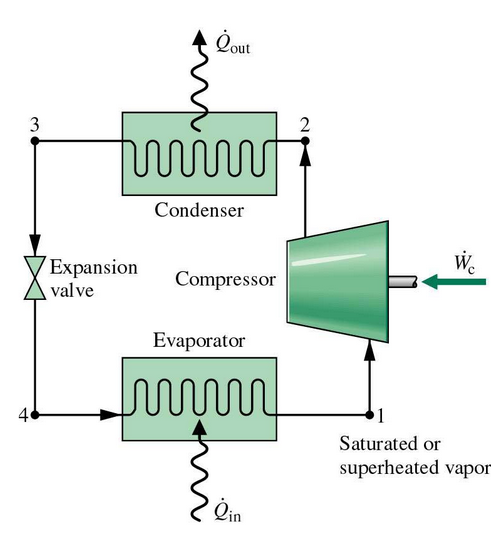

In [12]:
Image('../dados/imagens/sistema_refri_02.PNG')

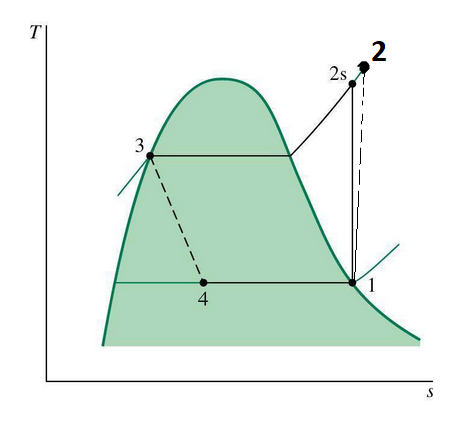

In [13]:
Image('../dados/imagens/sistema_refri_01.PNG')

$$ $$
Os dados da primeira parte são:

* $T_{c} = 4°C$
$$ $$
* $T_{h} = 27°C$
$$ $$
* $T_{3} = 37°C$
$$ $$
* $T_{1} = -6°C$
$$ $$
* $P_{comp} = 300W$
$$ $$
* $\eta_{c} = 0.85$
$$ $$
* fluido *R134a*
$$ $$
* $TR = 211 kJ/min$
$$ $$

**É solicitado:**

* efeito útil ou capacidade de refrigeração  ($ \dot{Q}_{in} $)

* COP da geladeira

Hipóteses:

* Cada componente é analisado como um VC operando em RP
$$ $$
* Todos os processos são internamente reversíveis, exceto o processo de expansão na válvula
$$ $$
* Os processos de compressão e de expansão são adiabáticos
$$ $$
* Variações de energia cinética e potencial devem ser desprezadas
$$ $$
* O ciclo é ideal para primeira parte da análise
$$ $$
* Processos 2-3 e 4-1 são isobáricos (pressão constante)
$$ $$
* Processo 3-4 é isoentálpico
$$ $$
* Condição de saturação em 1 e 3

Iniciamos obtendo as propriedades termodinâmicas do fluído nos estados 1 e 3 (vapor saturado e líquido saturado, respectivamente). Utilizou-se a **tabela A.10** (fluido R134a) do livro "*Fundamentos de Termodinâmica - Moran e Shapiro - 7ª edição*". 

Ainda vale observar que o sistema passa do estado termodinâmica $1$ para o $2$ (processo não isoentrópico).

In [ ]:
def interpola(x, par1, par2):
    '''
    :param x:       Float é a variável (X) conhecida do par
    :param par1:    Tuple (X1, Y1)
    :param par2:    Tuple (X2, Y2)
    :return:        Float é o número interpolado (variável Y desconhecida do par)
    '''
    X1, Y1 = par1
    X2, Y2 = par2
    Xa     = x

    Ya = (Xa - X1)/(X2 - X1)*(Y2 - Y1) + Y1

    return Ya


In [ ]:
# Propriedades estado 1
T1 = -6
h1 = interpola(T1, (-8, 242.54), (-4, 244.90))
s1 = interpola(T1, (-8, 0.9239), (-4, 0.9213))
p1 = interpola(T1, (-8, 2.1704), (-4, 2.5274))

# Propriedades estado 3
T3 = 37
h3 = interpola(T3, (36, 100.25), (38, 103.21))
s3 = interpola(T3, (36, 0.3678), (38, 0.3772))
p3 = interpola(T3, (36, 9.1168), (38, 9.6298))

In [ ]:
# tabela de dados
df = DataFrame({'Estado'            : [1, 3],
                'Temperatura (°C)'  : [T1,T3],
                'Entalpia (kJ/kg)'  : [h1,h3],
                'Entropia (kJ/kg.K)': [s1,s3],
                'Pressão (bar)'     : [p1,p3]})

df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1,-6,243.72,0.9226,2.3489
1,3,37,101.73,0.3725,9.3733


Para definição do estado termodinâmico 4 sabemos:

* $ T_{1} = T_{4} $

* $ h_{3} = h_{4}$

In [ ]:
# adicionando linha
h4 = h3
df.loc[2] = [4, T1, h4, nan, nan]
df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1.0,-6.0,243.72,0.9226,2.3489
1,3.0,37.0,101.73,0.3725,9.3733
2,4.0,-6.0,101.73,NaN,NaN


Para obter o estado termodinâmico 2 será considerado a eficiência isentrópica:

$$ $$

$$ \eta_{c} = \frac{h_{s2}-h_{1}}{h_{2}-h_{1}}$$

$$ $$
$$ $$

$$ h_{2} = \frac{h_{s2}-h_{1}}{\eta_{c}} + h_{1}  $$

$$ $$

$h_{s2}$ é definido pois:

* $s_{1} = s_{2}$

* $p_{3} = p_{2}$

$$ $$



In [ ]:
# Propriedades estado 2
p2 = p3
s2 = s1
efic_isent = 0.85

df.loc[3] = [2, nan, nan, s2, p2]
df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1.0,-6.0,243.72,0.9226,2.3489
1,3.0,37.0,101.73,0.3725,9.3733
2,4.0,-6.0,101.73,NaN,NaN
3,2.0,NaN,NaN,0.9226,9.3733


Consultando a **tabela A.12** e interpolando os valores:

In [ ]:
# Para p = 9 bar
h_9bar = interpola(s2, (0.9217, 271.25),  (0.9566, 282.34))

# Para p = 10 bar
h_10bar = interpola(s2, (0.9066, 268.68),  (0.9428, 280.19))

# Para h_s2
h_s2 = interpola(p2, (9, h_9bar), (10, h_10bar))

print('H_s2 =',h_s2)

H_s2 = 272.3689344260318


In [ ]:
h2 = (h_s2 - h1)/efic_isent + h1

# gravando na tabela
df.loc[3,'Entalpia (kJ/kg)'] = h2

df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1.0,-6.0,243.720000,0.9226,2.3489
1,3.0,37.0,101.730000,0.3725,9.3733
2,4.0,-6.0,101.730000,NaN,NaN
3,2.0,NaN,277.424629,0.9226,9.3733


Agora é necessário calcular $\dot{m}$ para obter as variáveis solicitadas no enunciado.

Fazendo o balanço de energia no VC do compressor:

$$ $$

$$ \dot{W}_{c} = \dot{m}(h_{2} - h_{1}) $$

$$ $$

In [ ]:
# Potência compressor
P = 300

# fluxo mássico
m_ponto = P/(h2*1e3 - h1*1e3)

print('Fluxo mássico é %.4f kg/s' % m_ponto)

Fluxo mássico é 0.0089 kg/s


Fazendo o balanço de energia no VC evaporador obtemos o **efeito útil de refrigeração**:

$$ $$

$$ \dot{Q}_{in} = \dot{m}(h_{1} - h_{4}) $$

$$ $$

E para o cálculo do **COP**:

$$ \beta = \frac{Q_{in}}{\dot{W}} $$

In [ ]:
# efeito útil
Q_in = m_ponto*(h1 - h4)

# COP
beta = Q_in*1e3/P

In [ ]:
# tabela de dados
df = DataFrame({'Variável' : ['fluxo mássico', 'efeito útil', 'COP'],
                'Valor'  : [round(m_ponto, 4), round(Q_in, 2), round(beta,2)],
                'Unidade'  : ['kg / s','kW','adimensional']})

df.head()

,Variável,Valor,Unidade
0,fluxo mássico,0.0089,kg / s
1,efeito útil,1.2600,kW
2,COP,4.2100,adimensional


$$ $$

# Parte 02

Será trabalhado sob as mesmas hipóteses da **PARTE 01**.

Os dados da segunda parte são:

$$ $$

* $T_{c} = 4°C$
$$ $$
* $T_{h} = 40°C$ $ $ (pior caso possível)
$$ $$
* $T_{3} = 50°C$
$$ $$
* $T_{1} = -6°C$
$$ $$
* $\dot{Q}_{in} = 120$ TR
$$ $$
* fluido *R134a*
$$ $$
* $TR = 211 kJ/min$

$$ $$

O roteiro seguido será análogo ao da **PARTE 01** com algumas diferenças sutis.Será necessário converter a unidade do $\dot{Q}_{in}$ de $TR$ para $W$. Além disso o problema não fornece eficiência a isentrópica, assumindo-se assim um compressor isoentrópico, ou seja, gráfico inicial $T-s$ sai do estado $1$ indo para $2s$ (linha vertical).

Iniciamos obtendo as propriedades termodinâmicas do fluído nos estados 1 e 3 (vapor saturado e líquido saturado, respectivamente). Utilizou-se a **tabela A.10** (fluido R134a) do livro "*Fundamentos de Termodinâmica - Moran e Shapiro - 7ª edição*".

In [ ]:
# Propriedades estado 1 já foram calculadas anteriormente

# Propriedades estado 3
T3 = 50
h3 = interpola(T3, (48, 118.35), (52, 124.58))
s3 = interpola(T3, (48, 0.4243), (52, 0.4432))
p3 = interpola(T3, (48, 12.526), (52, 13.851))

h4 = h3

In [ ]:
# tabela de dados
df = DataFrame({'Estado'            : [1, 3, 4],
                'Temperatura (°C)'  : [T1,T3,nan],
                'Entalpia (kJ/kg)'  : [h1,h3,h4],
                'Entropia (kJ/kg.K)': [s1,s3,nan],
                'Pressão (bar)'     : [p1,p3,nan]})

df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1,-6.0,243.720,0.92260,2.3489
1,3,50.0,121.465,0.43375,13.1885
2,4,NaN,121.465,NaN,NaN


O estado termodinâmico 2 está definido, pois:

* $s_{1} = s_{2}$

* $p_{3} = p_{2}$

$$ $$



In [ ]:
# Propriedades estado 2
p2 = p3
s2 = s1

df.loc[3] = [2, nan, nan, s2, p2]
df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1.0,-6.0,243.720,0.92260,2.3489
1,3.0,50.0,121.465,0.43375,13.1885
2,4.0,NaN,121.465,NaN,NaN
3,2.0,NaN,NaN,0.92260,13.1885


Consultando a tabela A.12 e interpolando os valores para obtenção da **entalpia**:

In [ ]:
# Para p = 12 bar
h_12bar = interpola(s2, (0.9164, 275.52),  (0.9527, 287.44))

# Para p = 14 bar
h_14bar = interpola(s2, (0.9003, 273.40),  (0.9297, 283.10))

# Para h_s2
h2 = interpola(p2, (12, h_12bar), (14, h_14bar))

df.loc[3,'Entalpia (kJ/kg)'] = h2
df.head()

,Estado,Temperatura (°C),Entalpia (kJ/kg),Entropia (kJ/kg.K),Pressão (bar)
0,1.0,-6.0,243.72000,0.92260,2.3489
1,3.0,50.0,121.46500,0.43375,13.1885
2,4.0,NaN,121.46500,NaN,NaN
3,2.0,NaN,279.45845,0.92260,13.1885


Após converter a unidade de $\dot{Q}_{in}$ para $W$, será cálculado o fluxo mássico, seguido da potência do compressor e COP:

$$ $$

$$ \dot{m} = \frac{\dot{Q}_{in}}{h_{1} - h_{4}} $$

$$ $$

$$ \dot{W}_{c} = \dot{m}(h_{2} - h_{1}) $$

$$ $$

$$ \beta = \frac{Q_{in}}{\dot{W}_{c}} $$


In [ ]:
Q_in = 120         # TR
Q_in = Q_in*211/60 # W

m_ponto = Q_in/(h1 - h4) # fluxo mássico

Wc = m_ponto*(h2 - h1)

beta = Q_in/Wc  # COP

In [ ]:
# tabela de dados
df = DataFrame({'Variável' : ['fluxo mássico', 'efeito útil', 'potência', 'COP'],
                'Valor'  : [round(m_ponto, 4), round(Q_in, 2), round(Wc, 2), round(beta,2)],
                'Unidade'  : ['kg / s','kW','kW','adimensional']})

df.head()

,Variável,Valor,Unidade
0,fluxo mássico,3.4518,kg / s
1,efeito útil,422.0000,kW
2,potência,123.3600,kW
3,COP,3.4200,adimensional


# Questões dissertativas

* Sistemas de refrigeração de pequeno porte, como geladeiras e freezers mais antigos, utilizam um sistema de controle On-Off. O sistema funciona da seguinte maneira: primeiro, se define uma temperatura setpoint. O sensor de temperatura é posicionado na parte inferior da geladeira, já que a troca de temperatura da geladeira ocorre na parte superior. Quando o sistema estiver a uma temperatura acima do valor do setpoint, o sistema de refrigeração é ativado, até que a temperatura medida volte a ficar abaixo da temperatura de setpoint, quando o sistema é novamente desligado.

  Esse sistema de controle é extremamente simples e barato de ser implementado, porém sistemas de refrigeração mais modernos utilizam controles mais complexos, já que o controle On-Off resulta em uma oscilação muito grande de temperatura que nem sempre é tolerada, além de reduzir a vida útil do sistema de refrigeração como um todo.

* Uma geladeira simples antiga possui em média 300 W de potência. Considerando que o compressor fica ligado 12 horas por dia, já que a oscilação de um aparelho com sistema de controle On-Off resulta em períodos em que o compressor está ligado e desligado aproximadamente iguais, pode-se considerar que essa geladeira antiga gastaria 108 kWh por mês. Assim, comparando a uma geladeira mais moderna com capacidade de 440 litros, obtemos uma diferença de consumo de 40 kWh por mês, o que equivale a uma economia de 37.6%.

    Para um refrigerador com compressor de rotação variável, o sistema de controle deve regular a rotação do compressor através de uma malha de controle simples, em que um controlador PID, por exemplo, é ajustado de modo a manter o erro da temperatura medida com a temperatura referência o mais próximo de zero, mantendo assim a temperatura interior o mais constante possível.



* Recalculando a potência para o refrigerador da questão 2 à temperatura ambiente de 12ºC, obtem-se uma potência de 44.29kW, comparado a potência de 102.8kW calculada à temperatura ambiente de 40ºC. Isso indica que existe um impacto muito significativo no consumo do refrigerador, e consequentemente no custo, decorrente de uma variação muito grande da temperatura ambiente, podendo ser 2 vezes maior ou menor dependendo da época do ano.

* Um sistema de compressão "sliding pressure" varia a pressão final do compressor dependendo da temperatura ambiente, de modo a otimizar o consumo energético do refrigerador, diminuindo os efeitos de grandes variações da temperatura ambiente como visto na questão anterior. Isso significa que o sistema de controle deve, por meio de outra malha de controle em paralelo, regular a pressão do compressor de modo que o trabalho necessário para que o circuito seja realizado fique o mais otimizado possível.